# Supporting Notebook with analytical narratives

Imported all the libraries needed for the analysis.

In [1]:
import numpy as np
import pandas as pd

import networkx as nx

# for the plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

import string
import pickle

# for linear regressions
from scipy import stats

# for linear regressions with train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from collections import Counter
from wordcloud import WordCloud
from ast import literal_eval

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LinearRegression

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [2]:
filename = 'hp_script.csv'
script = pd.read_csv(filename, encoding='cp1252')
script.head()

ID_number  scene      character_name  \
0          1      1    Albus Dumbledore   
1          2      1  Minerva McGonagall   
2          3      1    Albus Dumbledore   
3          4      1  Minerva McGonagall   
4          5      1    Albus Dumbledore   

                                            dialogue  
0  I should have known that you would be here, Pr...  
1  Good evening, Professor Dumbledore. Are the ru...  
2   I'm afraid so, Professor. The good, and the bad.  
3                                       And the boy?  
4                            Hagrid is bringing him.

In [3]:
script.drop(columns='ID_number', inplace=True)
script.head()

scene      character_name  \
0      1    Albus Dumbledore   
1      1  Minerva McGonagall   
2      1    Albus Dumbledore   
3      1  Minerva McGonagall   
4      1    Albus Dumbledore   

                                            dialogue  
0  I should have known that you would be here, Pr...  
1  Good evening, Professor Dumbledore. Are the ru...  
2   I'm afraid so, Professor. The good, and the bad.  
3                                       And the boy?  
4                            Hagrid is bringing him.

In [4]:
lines = script['character_name'].value_counts()
character = pd.DataFrame(script['character_name'].unique(), columns=['name'])
character['lines'] = character['name'].apply(lambda name: lines[name])
character.sort_values(by='lines', ascending=False, inplace=True)
character.set_index('name', inplace=True)
character.head()

lines
name                     
Harry Potter          230
Ron Weasley           120
Hermione Granger       92
Rubeus Hagrid          81
Minerva McGonagall     31

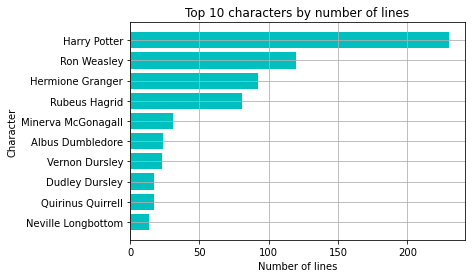

In [5]:
top10 = character.head(10)

plt.title('Top 10 characters by number of lines')
plt.barh(top10.index, top10['lines'],color='c')
plt.gca().invert_yaxis()
plt.xlabel('Number of lines')
plt.ylabel('Character')
plt.grid()
plt.show()

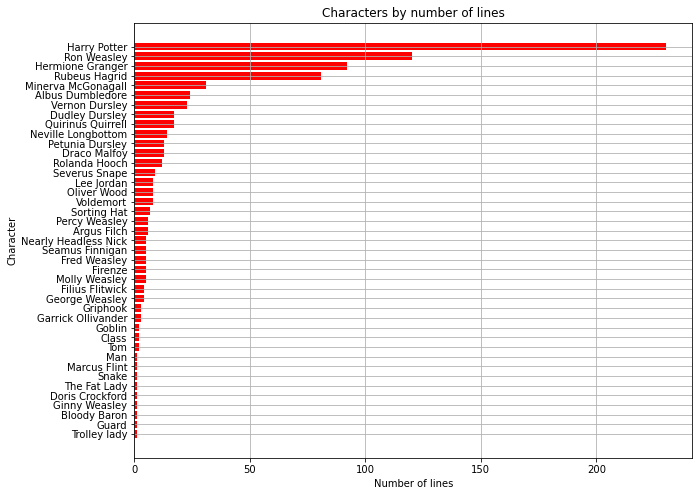

In [6]:
from matplotlib.pyplot import figure
top = character
figure(figsize=(10,8))
plt.title('Characters by number of lines')
plt.barh(top.index, top['lines'],color='r')
plt.gca().invert_yaxis()
plt.xlabel('Number of lines')
plt.ylabel('Character')
plt.grid()
plt.show()

In [7]:
script['words'] = script['dialogue'].apply(lambda x: len(x.split()))
script.head()

scene      character_name  \
0      1    Albus Dumbledore   
1      1  Minerva McGonagall   
2      1    Albus Dumbledore   
3      1  Minerva McGonagall   
4      1    Albus Dumbledore   

                                            dialogue  words  
0  I should have known that you would be here, Pr...     11  
1  Good evening, Professor Dumbledore. Are the ru...      9  
2   I'm afraid so, Professor. The good, and the bad.      9  
3                                       And the boy?      3  
4                            Hagrid is bringing him.      4

In [8]:
number_words = script[['character_name','words']]
number_words = number_words.sort_values(by='words',ascending=False)
total_char_words = number_words.groupby('character_name', as_index=False).words.sum()
total_char_words = total_char_words.sort_values('words',ascending=False)
total_char_words.head()

character_name  words
16      Harry Potter   1609
31     Rubeus Hagrid   1415
30       Ron Weasley    932
17  Hermione Granger    905
0   Albus Dumbledore    712

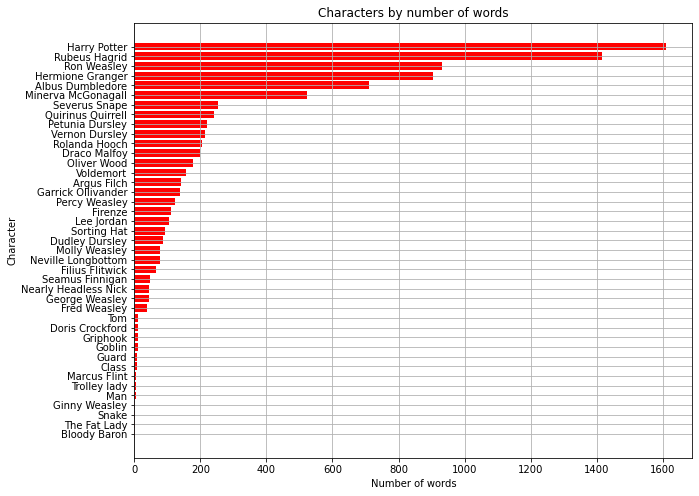

In [9]:
figure(figsize=(10,8))
plt.title('Characters by number of words')
plt.barh(total_char_words.character_name, total_char_words['words'],color='r')
plt.gca().invert_yaxis()
plt.xlabel('Number of words')
plt.ylabel('Character')
plt.grid()
plt.show()

In [10]:
from nltk.corpus import stopwords
stop_words   = (stopwords.words('english'))

In [11]:
extra_words=['A','All','and','And','But','come','could','day','even','He',
             'he','it','It','If','I','In','like','man','made','men','must',
             'Man','One','one','She','see','she','said','say','Say','sort',
             'still','the','That','To','They','This','The','Then','There',
             'would','two','What','You','-','_','—','***','Gutenberg','Oh',
             'No','Well','Whoa','Wow','Just','How','Come','Yes','Help','Good',
            'Thank','Sorry','Ah','Ahh','Ahhh','AHHHH','Mr','Okey','Let','Excuse',
            'AHHHHH']

In [12]:
dialogue = ''
for d in script['dialogue']:
    dialogue += d
    dialogue += ' '
dialogue

"I should have known that you would be here, Professor McGonagall. Good evening, Professor Dumbledore. Are the rumours true Albus? I'm afraid so, Professor. The good, and the bad. And the boy? Hagrid is bringing him. Do you think it wise to trust Hagrid with something as important as this? Ah, Professor, I would trust Hagrid with my life. Professor Dumbledore, Sir. Professor McGonagall. No problems, I trust, Hagrid? No, Sir. Little tyke fell asleep just as we were flying over Bristol. Heh.Try not to wake him. There you go. Albus, do you really think it's safe, leaving him with these people? I've watched them all day. They're the worst sort of Muggles imaginable. They really are… The only family he has. This boy will be famous. There won't be a child in our world who doesn't know his name. Exactly. He's far better off growing up away from all of that. Until he is ready. There there, Hagrid. It's not really goodbye, after all. Good luck, Harry Potter. Up. Get up. Now! Wake up, cousin! We

In [13]:
from nltk.tokenize import word_tokenize
word_tokens  = word_tokenize(dialogue)

In [14]:
filtered_book = []
for w in word_tokens:
    w = re.split("['-]", w)
    filtered_book.append(w[0])
    if len(w) > 1:
        filtered_book.append(w[1])
filtered_book = [w for w in filtered_book if not w in stop_words]
filtered_book2 = [w for w in filtered_book if not w in extra_words]


punctuations = '''!()-,[]{};:’“”'"\,,<>./?@#$%^&*_~'''
filtered_book3 = [w for w in filtered_book2 if not w in punctuations]



numTokens = len(filtered_book3)
numTokens

4480

In [15]:
characters = character.index
character_list = []
for c in characters:
    c = c.split()
    ch = c[0]
    if ch != 'The':
        if ch in filtered_book3:
            character_list.append(ch)
numCharacters = len(character_list)

In [16]:
character_map={}
for i in range(numCharacters):
    character_map[i]=character_list[i]

character_map

{0: 'Harry',
 1: 'Ron',
 2: 'Hermione',
 3: 'Rubeus',
 4: 'Albus',
 5: 'Vernon',
 6: 'Dudley',
 7: 'Neville',
 8: 'Petunia',
 9: 'Draco',
 10: 'Oliver',
 11: 'Voldemort',
 12: 'Percy',
 13: 'Nearly',
 14: 'Seamus',
 15: 'Fred',
 16: 'Firenze',
 17: 'George',
 18: 'Tom',
 19: 'Marcus',
 20: 'Doris'}

In [17]:
k=0;
numOccurrences=pd.Series(range(numCharacters))
for c in character_list:
    numOccurrences[k] = filtered_book3.count(c)
    k=k+1

In [18]:
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a) 

In [19]:
for j in range(numCharacters):
    positions_current   =[]
    for i in range(numTokens):
        if filtered_book3[i]==character_list[j]:
            #print(i)
            positions_current.append(i)
    positions_characters[j][:]=positions_current

In [20]:
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<100):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)

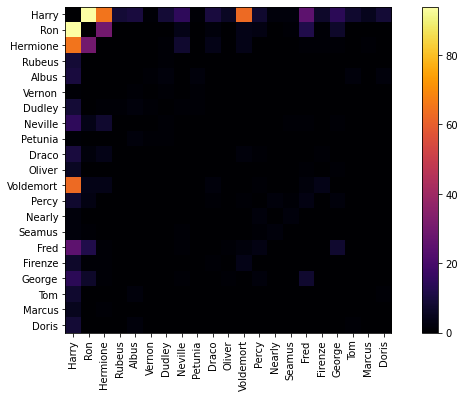

In [21]:
fig2 = plt.figure(figsize = (11, 6)) 
ax2    = fig2.add_subplot(111)
plt.imshow(interactions_characters,cmap=matplotlib.cm.inferno) 
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax2.tick_params(axis='x', rotation=90, labelsize=10)

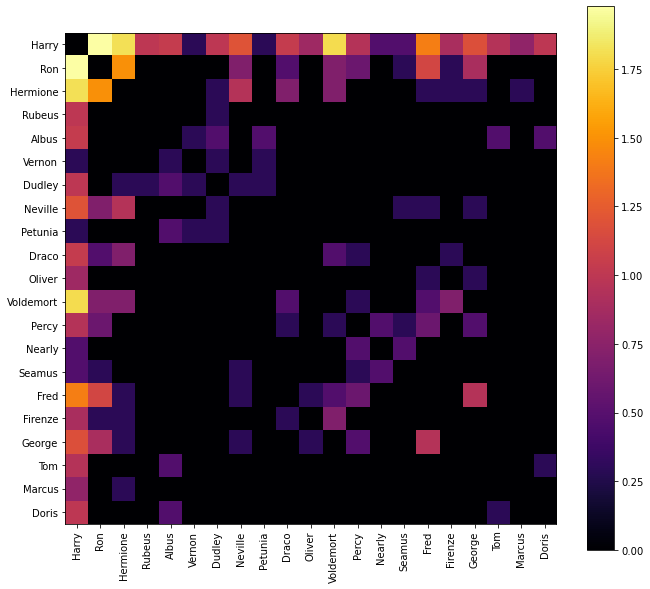

In [22]:
fig3 = plt.figure(figsize = (11, 10)) 
ax3    = fig3.add_subplot(111)
plt.imshow(np.log10(1+interactions_characters),cmap=matplotlib.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax3.tick_params(axis='x', rotation=90, labelsize=10)

In [23]:
interactions_characters.shape

(21, 21)

In [24]:
interactions_characters[0,0:7]

array([ 0., 94., 65.,  9., 10.,  1.,  9.])

In [25]:
interactions_characters[1,0:7]

array([94.,  0., 30.,  0.,  0.,  0.,  0.])

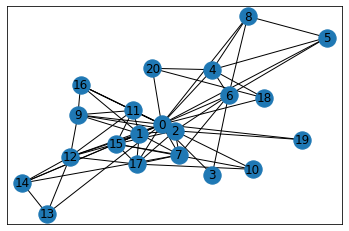

In [26]:
G1=nx.from_numpy_matrix(interactions_characters)
nx.draw_networkx(G1)

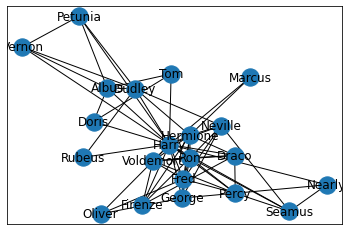

In [27]:
H1    = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1)

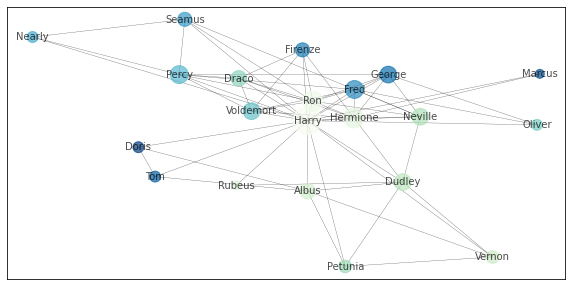

In [28]:
kdeg  = G1.degree()
fig   = plt.figure(figsize = (10, 5))
ax1   = plt.subplot(111)
H1    = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=10, cmap=matplotlib.cm.GnBu
                 ,node_size =[40*val for (node,val) in kdeg])

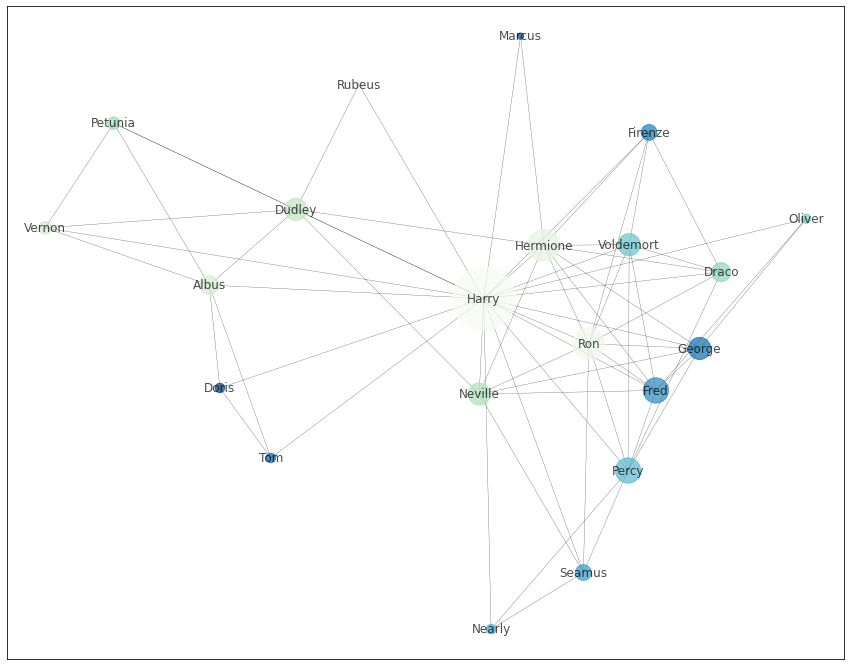

In [29]:
fig   = plt.figure(figsize = (15, 12))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(np.log10(1+interactions_characters)), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, font_size=12, cmap=matplotlib.cm.GnBu,node_size =[10*(val**2) for (node,val) in kdeg])

In [30]:
degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1,degree_centrality,'dc')
centralityValues=[v for v in degree_centrality.values()]
cliques = list(nx.find_cliques(H1))
cl2 = list(cliques)
len(cl2)

15

(-0.6723378444116768,
 1.079635135448175,
 -0.8624851775315987,
 0.7944228262838009)

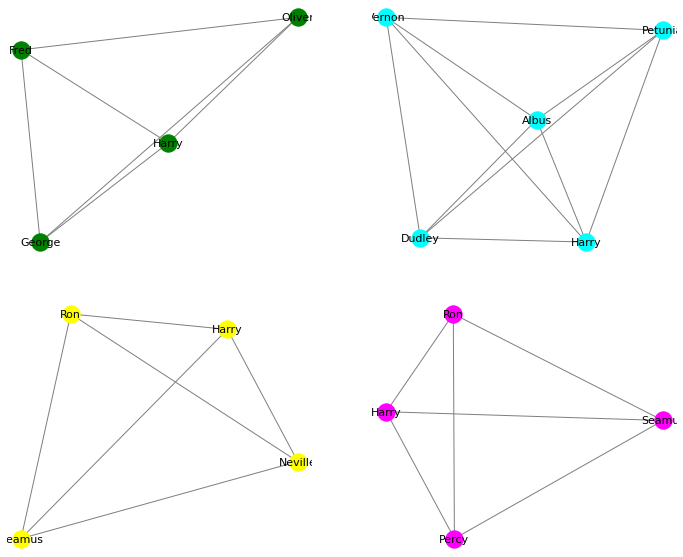

In [31]:
fig   = plt.figure(figsize = (12, 10))
ax1  = fig.add_subplot(221)
nx.draw_networkx(H2.subgraph(cl2[0]),font_size=11,font_color='black',node_color='green',edge_color='gray')
plt.axis('off')
ax2  = fig.add_subplot(222)
nx.draw_networkx(H2.subgraph(cl2[1]),font_size=11,font_color='black',node_color='cyan',edge_color='gray')
plt.axis('off')
ax3  = fig.add_subplot(223)
nx.draw_networkx(H2.subgraph(cl2[7]),font_size=11,font_color='black',node_color='yellow',edge_color='gray')
plt.axis('off')
ax4  = fig.add_subplot(224)
nx.draw_networkx(H2.subgraph(cl2[8]),font_size=11,font_color='black',node_color='#ff00ff',edge_color='gray')
plt.axis('off')

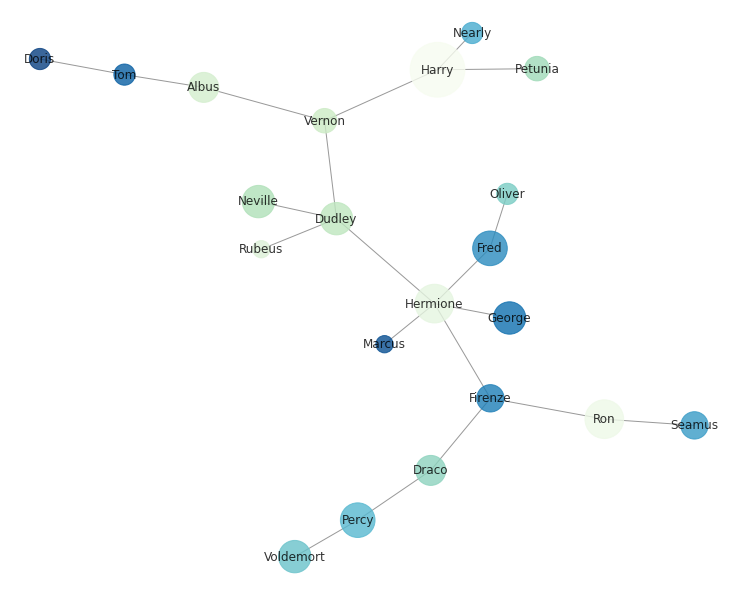

In [32]:
T = nx.minimum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=12,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])

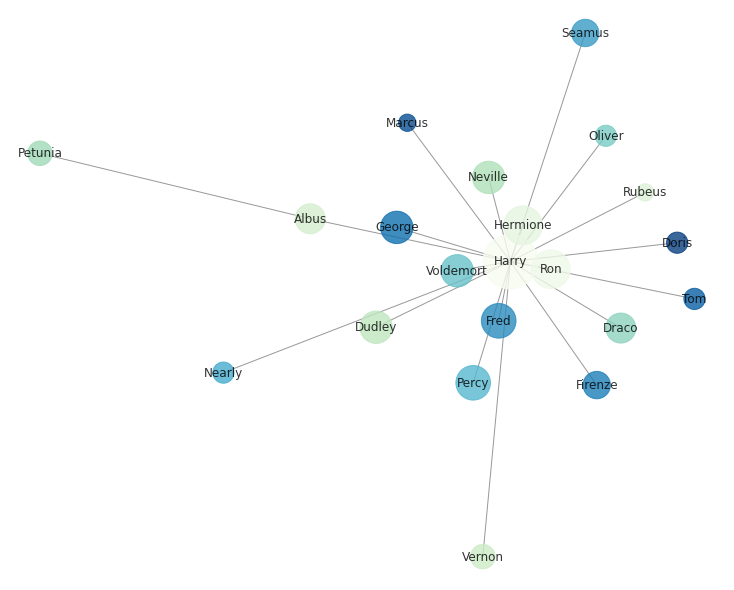

In [33]:
T = nx.maximum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=12,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])

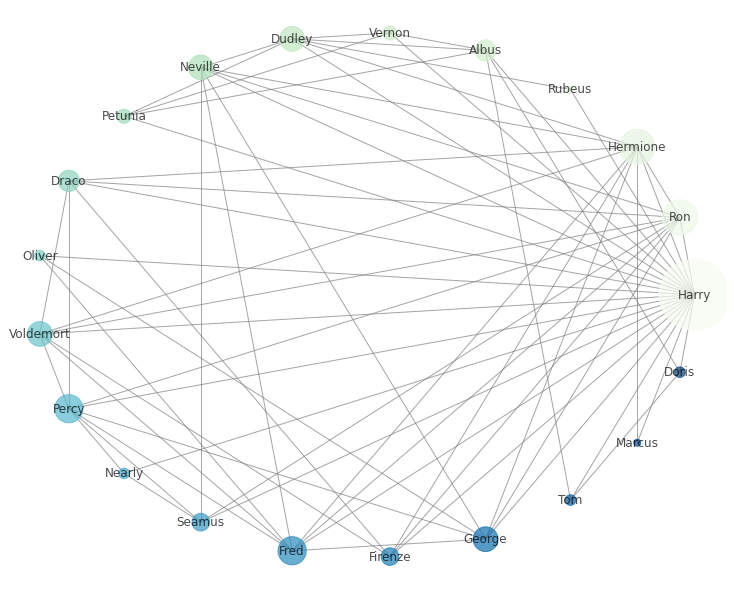

In [34]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H1, node_color=range(numCharacters),font_color='black',alpha=0.7,edge_color='gray',
                 edge_weight=3,
                 font_size=12,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[5000*(v**2) for v in degree_centrality.values()])

In [35]:
string_text = ' '.join(filtered_book3)

In [36]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chikaze/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
tagged = nltk.pos_tag(filtered_book3)
tagged[2]

('McGonagall', 'NNP')

In [38]:
names = []
for n in characters:
    nn = n.split()
    names.append(nn[0])
    if len(nn)>1:
        names.append(nn[1])
names

['Harry',
 'Potter',
 'Ron',
 'Weasley',
 'Hermione',
 'Granger',
 'Rubeus',
 'Hagrid',
 'Minerva',
 'McGonagall',
 'Albus',
 'Dumbledore',
 'Vernon',
 'Dursley',
 'Dudley',
 'Dursley',
 'Quirinus',
 'Quirrell',
 'Neville',
 'Longbottom',
 'Petunia',
 'Dursley',
 'Draco',
 'Malfoy',
 'Rolanda',
 'Hooch',
 'Severus',
 'Snape',
 'Lee',
 'Jordan',
 'Oliver',
 'Wood',
 'Voldemort',
 'Sorting',
 'Hat',
 'Percy',
 'Weasley',
 'Argus',
 'Filch',
 'Nearly',
 'Headless',
 'Seamus',
 'Finnigan',
 'Fred',
 'Weasley',
 'Firenze',
 'Molly',
 'Weasley',
 'Filius',
 'Flitwick',
 'George',
 'Weasley',
 'Griphook',
 'Garrick',
 'Ollivander',
 'Goblin',
 'Class',
 'Tom',
 'Man',
 'Marcus',
 'Flint',
 'Snake',
 'The',
 'Fat',
 'Doris',
 'Crockford',
 'Ginny',
 'Weasley',
 'Bloody',
 'Baron',
 'Guard',
 'Trolley',
 'lady']

In [39]:
noun = []
for l in tagged:
    if l[1] == 'NNP':
        noun.append(l[0])

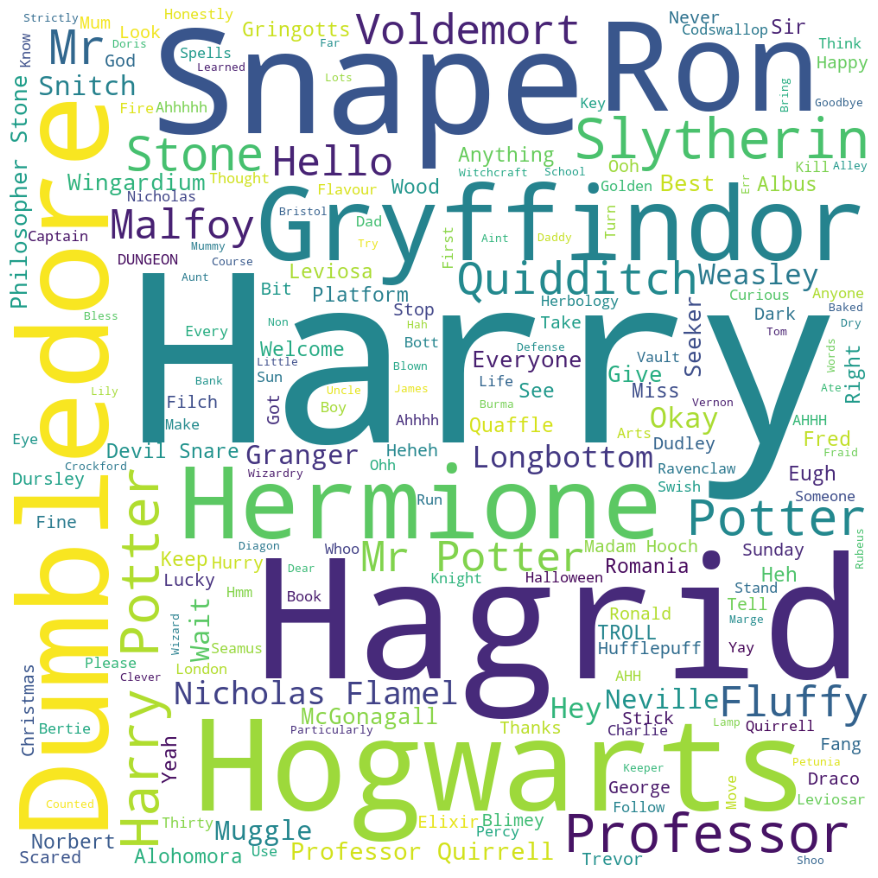

In [40]:
nouns = []
for n in noun:
    if len(n) > 2:
        nouns.append(n)
string_text = ' '.join(nouns)        
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', colormap=matplotlib.cm.viridis,
                min_font_size = 10).generate(string_text) 
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

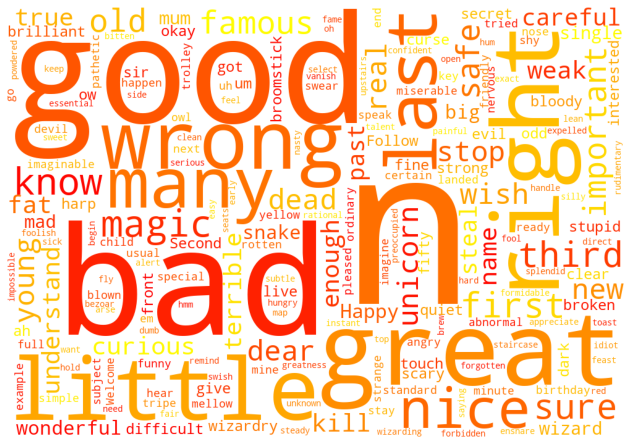

In [41]:
Adjective = []
for l in tagged:
    if l[1] == 'JJ':
        Adjective.append(l[0])
string_text = ' '.join(Adjective)
wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='white', colormap=matplotlib.cm.autumn,
                min_font_size = 12).generate(string_text) 
# plot the WordCloud image                        
plt.figure(figsize = (11, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

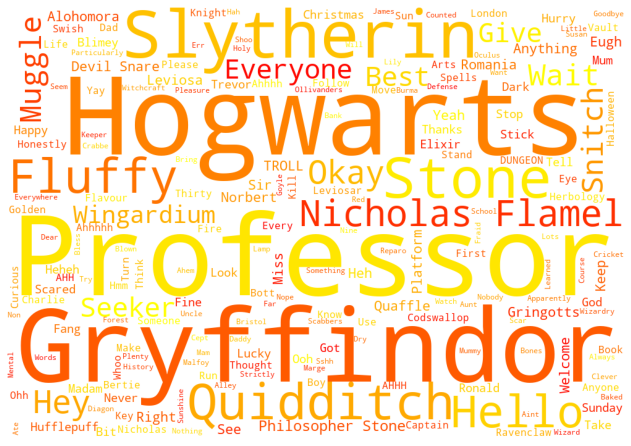

In [42]:
NNP = []
for l in tagged:
    if l[1] == 'NNP':
        if l[0] not in characters:
            if l[0] not in names:
                if len(l[0]) > 2:
                    if l[0] != 'Mr.':
                        NNP.append(l[0])

string_text = ' '.join(NNP)
wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='white', colormap=matplotlib.cm.autumn,
                min_font_size = 12).generate(string_text) 
# plot the WordCloud image                        
plt.figure(figsize = (11, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

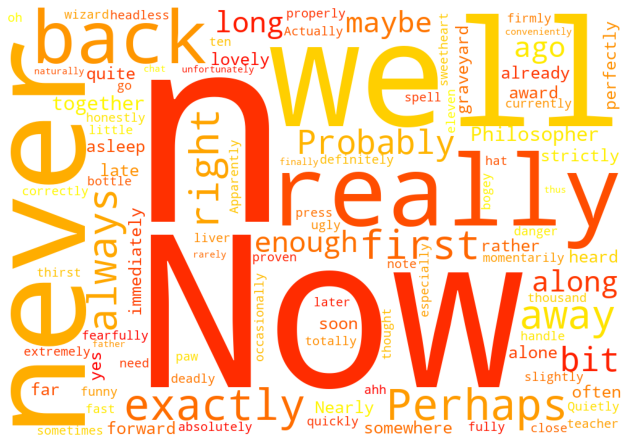

In [43]:
RB = []
for l in tagged:
    if l[1] == 'RB':
        RB.append(l[0])
string_text = ' '.join(RB)
wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='white', colormap=matplotlib.cm.autumn,
                min_font_size = 12).generate(string_text) 
# plot the WordCloud image                        
plt.figure(figsize = (11, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [44]:
character = script['character_name'].unique()

In [45]:
characters = []
for c in character:
    characters.append(c)

In [46]:
character_list = []
for c in characters:
    character_list.append(c)
numCharacters = len(character_list)

In [47]:
character_map={}
for i in range(numCharacters):
    character_map[i]=character_list[i]

character_map

{0: 'Albus Dumbledore',
 1: 'Minerva McGonagall',
 2: 'Rubeus Hagrid',
 3: 'Petunia Dursley',
 4: 'Dudley Dursley',
 5: 'Vernon Dursley',
 6: 'Harry Potter',
 7: 'Snake',
 8: 'Tom',
 9: 'Doris Crockford',
 10: 'Quirinus Quirrell',
 11: 'Goblin',
 12: 'Griphook',
 13: 'Garrick Ollivander',
 14: 'Guard',
 15: 'Molly Weasley',
 16: 'George Weasley',
 17: 'Fred Weasley',
 18: 'Ginny Weasley',
 19: 'Ron Weasley',
 20: 'Trolley lady',
 21: 'Hermione Granger',
 22: 'Neville Longbottom',
 23: 'Draco Malfoy',
 24: 'Sorting Hat',
 25: 'Seamus Finnigan',
 26: 'Percy Weasley',
 27: 'Nearly Headless Nick',
 28: 'Bloody Baron',
 29: 'The Fat Lady',
 30: 'Severus Snape',
 31: 'Rolanda Hooch',
 32: 'Class',
 33: 'Argus Filch',
 34: 'Oliver Wood',
 35: 'Filius Flitwick',
 36: 'Lee Jordan',
 37: 'Marcus Flint',
 38: 'Man',
 39: 'Firenze',
 40: 'Voldemort'}

In [48]:
c = script.character_name
character = []
for c in c:
    character.append(c)
numSs = len(character)

In [49]:
k=0;
numOccurrences=pd.Series(range(numCharacters))
for c in character_list:
    numOccurrences[k] = character.count(c)
    k=k+1

In [50]:
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a) 

In [51]:
for j in range(numCharacters):
    positions_current   =[]
    for i in range(numSs):
        if character[i]==character_list[j]:
            #print(i)
            positions_current.append(i)
    positions_characters[j][:]=positions_current

In [52]:
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<2):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)

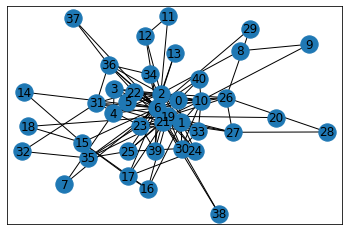

In [53]:
G1=nx.from_numpy_matrix(interactions_characters)
nx.draw_networkx(G1)

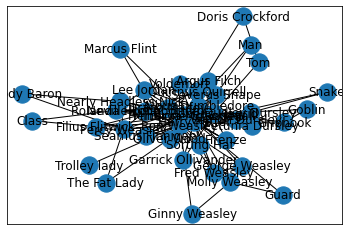

In [54]:
H1    = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1)

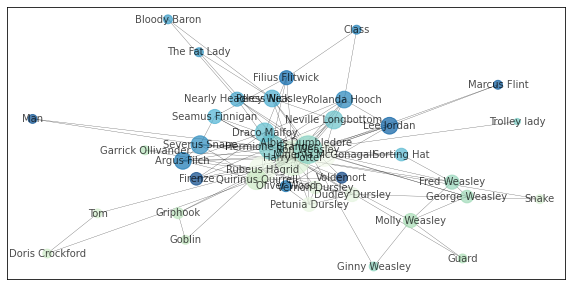

In [55]:
kdeg  = G1.degree()
fig   = plt.figure(figsize = (10, 5))
ax1   = plt.subplot(111)
H1    = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=10, cmap=matplotlib.cm.GnBu
                 ,node_size =[40*val for (node,val) in kdeg])

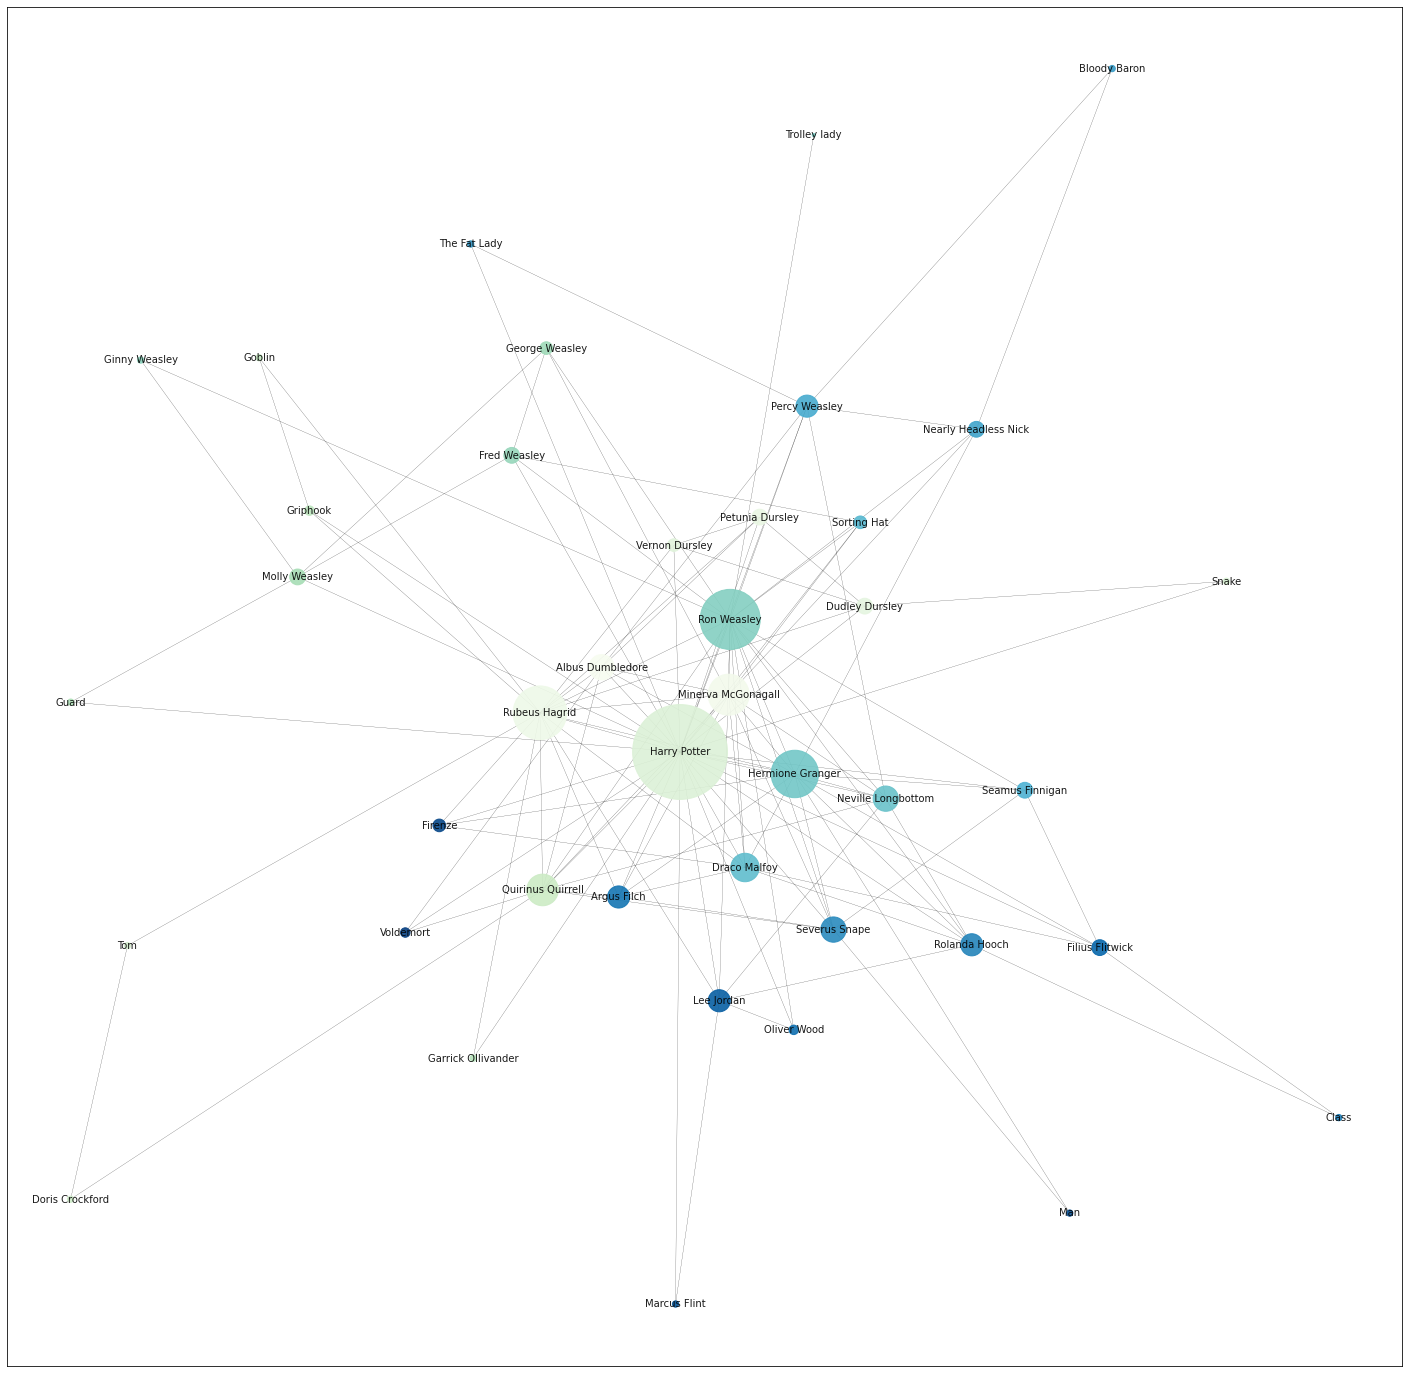

In [56]:
fig   = plt.figure(figsize = (25, 25))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(np.log10(1+interactions_characters)), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.2,alpha=0.9, font_size=10, cmap=matplotlib.cm.GnBu,node_size =[10*(val**2) for (node,val) in kdeg])

In [57]:
degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1,degree_centrality,'dc')
centralityValues=[v for v in degree_centrality.values()]
cliques = list(nx.find_cliques(H1))
cl2 = list(cliques)
len(cl2)

51

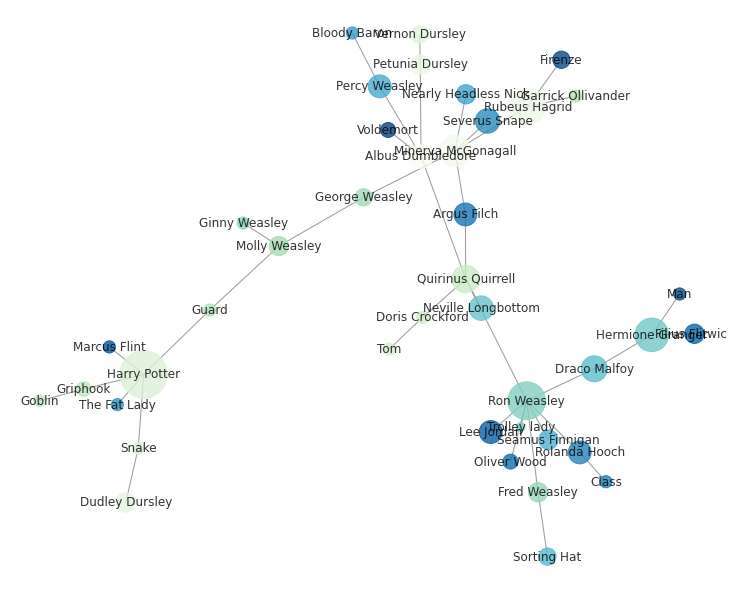

In [58]:
T = nx.minimum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=12,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])

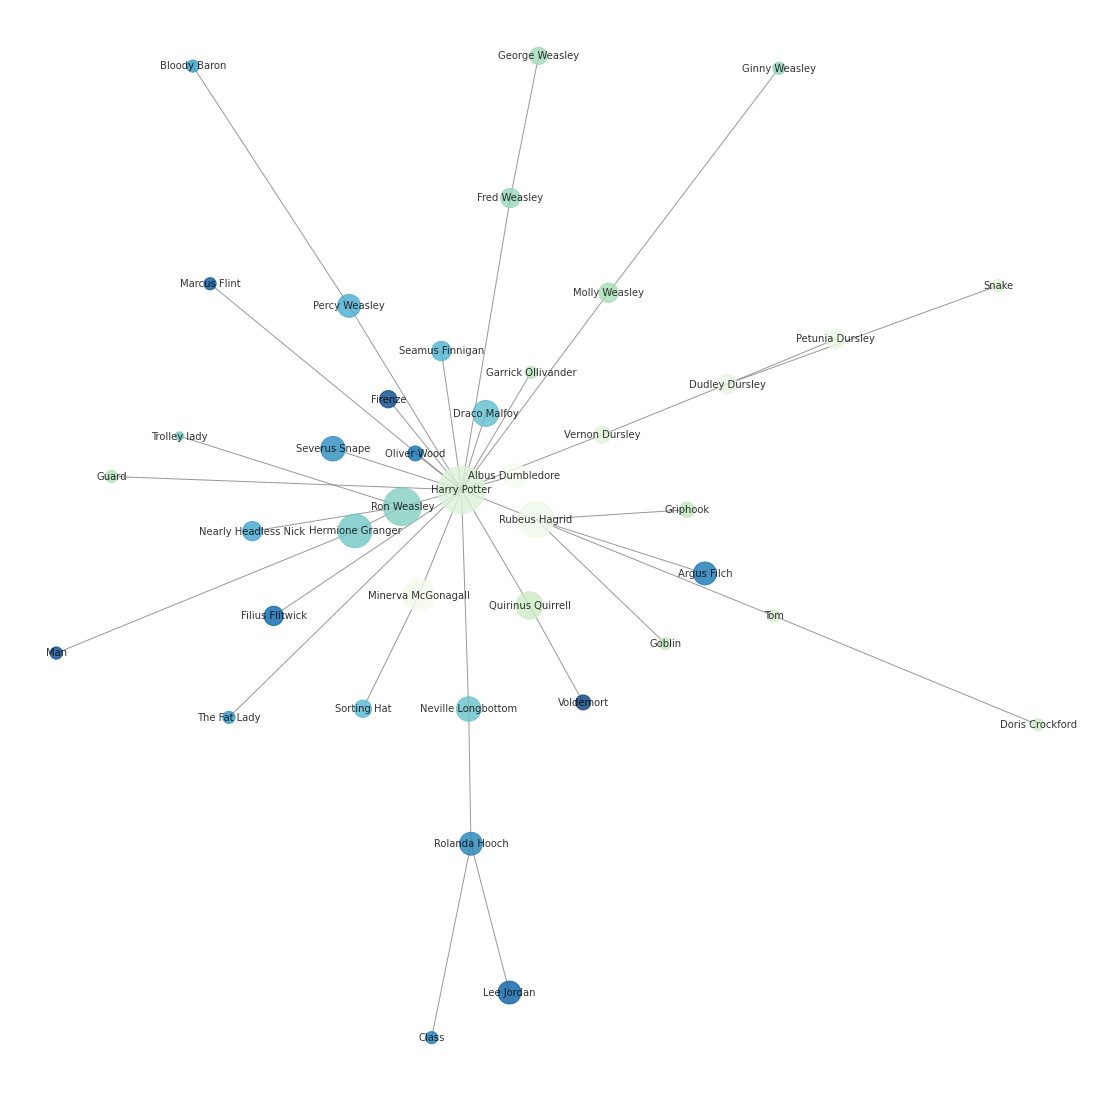

In [59]:
T = nx.maximum_spanning_tree(H1)
fig   = plt.figure(figsize = (15, 15))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=10,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])

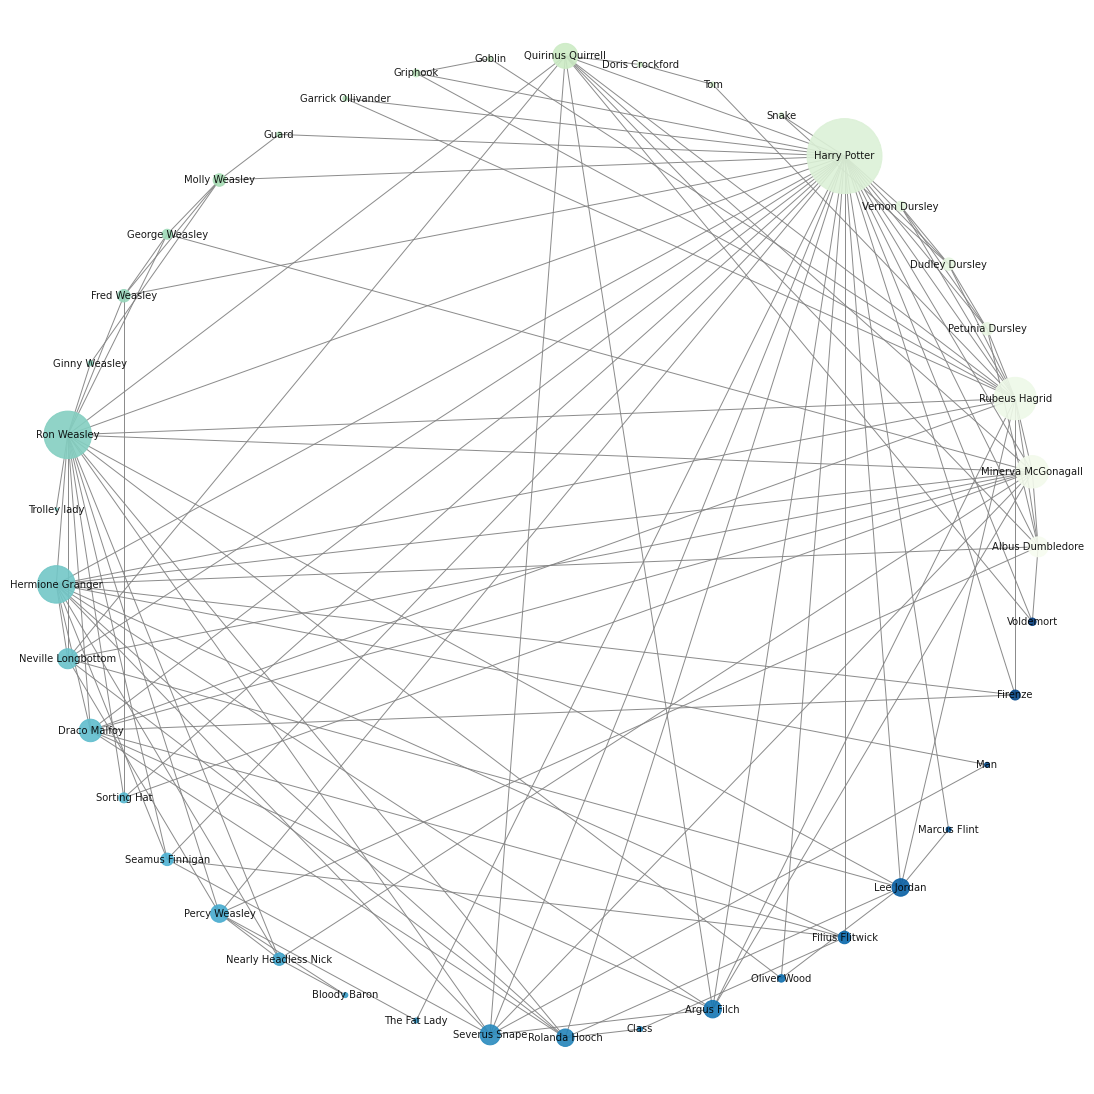

In [60]:
fig   = plt.figure(figsize = (15,15))
nx.draw_circular(H1, node_color=range(numCharacters),font_color='black',alpha=0.9,edge_color='gray',
                 edge_weight=10,
                 font_size=10,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[10000*(v**2) for v in degree_centrality.values()])

(-0.9030619821137635,
 1.0906219991482744,
 -0.7827286693669632,
 0.7504428687100861)

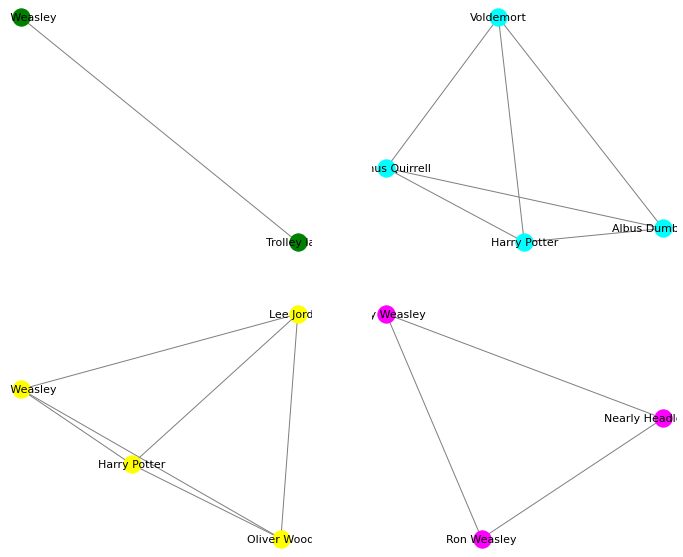

In [61]:
fig   = plt.figure(figsize = (12, 10))
ax1  = fig.add_subplot(221)
nx.draw_networkx(H2.subgraph(cl2[0]),font_size=11,font_color='black',node_color='green',edge_color='gray')
plt.axis('off')
ax2  = fig.add_subplot(222)
nx.draw_networkx(H2.subgraph(cl2[15]),font_size=11,font_color='black',node_color='cyan',edge_color='gray')
plt.axis('off')
ax3  = fig.add_subplot(223)
nx.draw_networkx(H2.subgraph(cl2[20]),font_size=11,font_color='black',node_color='yellow',edge_color='gray')
plt.axis('off')
ax4  = fig.add_subplot(224)
nx.draw_networkx(H2.subgraph(cl2[50]),font_size=11,font_color='black',node_color='#ff00ff',edge_color='gray')
plt.axis('off')

In [62]:
NNP

['Professor',
 'Professor',
 'Are',
 'Professor',
 'Professor',
 'Professor',
 'Sir',
 'Professor',
 'Sir',
 'Little',
 'Bristol',
 'Heh.Try',
 'Muggles',
 'Get',
 'Aunt',
 'Hurry',
 'Bring',
 'Uncle',
 'Are',
 'Thirty',
 'Counted',
 'Thirty',
 'Err',
 'Any',
 'Make',
 'Move',
 'MOVE',
 'Burma',
 'Was',
 'Mummy',
 'Thanks',
 'Any',
 'Mum',
 'AHH',
 'Mum',
 'Marge',
 'Ate',
 'Dad',
 'Look',
 'Hey',
 'Have',
 'Shoo',
 'Fine',
 'Sunday',
 'Sunday',
 'Sunday',
 'AHH',
 'Make',
 'Please',
 'Please',
 'Give',
 'Give',
 'Get',
 'Far',
 'Where',
 'Daddy',
 'Dry',
 'Boy',
 'Particularly',
 'Got',
 'Fraid',
 'Baked',
 'Words',
 'Heh',
 'Keeper',
 'keys',
 'Hogwarts',
 'Course',
 'Hogwarts',
 'Blimey',
 'Learned',
 'Once',
 'Did',
 'Anything',
 'Dear',
 'Hogwarts',
 'School',
 'Witchcraft',
 'Wizardry',
 'Blown',
 'Lily',
 'James',
 'Muggle',
 'Muggle',
 'Non',
 'Never',
 'Hogwarts',
 'Strictly',
 'Okay',
 'Ooh',
 'Best',
 'Hmm',
 'Could',
 'London',
 'Hogwarts',
 'Bless',
 'Hello',
 'Professor',

In [63]:

script

scene      character_name  \
0        1    Albus Dumbledore   
1        1  Minerva McGonagall   
2        1    Albus Dumbledore   
3        1  Minerva McGonagall   
4        1    Albus Dumbledore   
..     ...                 ...   
788     34       Rubeus Hagrid   
789     34        Harry Potter   
790     34       Rubeus Hagrid   
791     34    Hermione Granger   
792     34        Harry Potter   

                                              dialogue  words  
0    I should have known that you would be here, Pr...     11  
1    Good evening, Professor Dumbledore. Are the ru...      9  
2     I'm afraid so, Professor. The good, and the bad.      9  
3                                         And the boy?      3  
4                              Hagrid is bringing him.      4  
..                                                 ...    ...  
788  Go on. On with you, on with you now. Oh, now l...     44  
789  But Hagrid, we're not allowed to do magic away...     14  
790     I do, but your cousin don't, do he? Eh? Hmmhmm     10  
791        Feels strange to be going home, doesn't it?      8  
792                    I'm not going home, not really.      6  

[793 rows x 4 columns]

In [64]:
hp = pd.read_csv('hp_script.csv',encoding='cp1252')

In [65]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

hp['cleanText']=hp['dialogue'].map(lambda x:preprocess(x))

In [66]:
twitter = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='cp1252', names = ['label', 'id', 'date', 'flag', 'user', 'text'])

# dropping irrelevant columns

twitter = twitter.drop(['id', 'date', 'flag', 'user'], axis=1)


In [67]:
# Dataset contains 1,600,000 rows. This is a very large dataset, so I will take a sample 1/4 the size of this.

twit_samp = twitter.sample(n=1600000,replace=False)



In [68]:
# creating new column of clean text using previously defined function

twit_samp['cleanText']=twit_samp['text'].map(lambda x:preprocess(x))

In [69]:

# filtering data to only use tweets with more than two words after processing

twit_samp['clean_wordcount'] = twit_samp['cleanText'].map(lambda x:len(re.findall(r'\w+', x)))



In [70]:
filtered_twit = twit_samp[twit_samp['clean_wordcount'] > 2]
x_train_samp = filtered_twit['cleanText']
y_train_samp = filtered_twit['label']

y_train_samp = y_train_samp.replace(4,1)

In [71]:
x_train_samp, x_valid_samp, y_train_samp, y_valid_samp = train_test_split(x_train_samp, y_train_samp, test_size=0.1)
tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(x_train_samp.values) + list(x_valid_samp.values)
vectorizer.fit(full_text)
train_vectorized_samp = vectorizer.transform(x_train_samp)
test_vectorized_samp = vectorizer.transform(x_valid_samp)
hp_vectorized = vectorizer.transform(hp['cleanText'])


/Users/chikaze/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [72]:
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg.fit(train_vectorized_samp, y_train_samp)
LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg.score(test_vectorized_samp, y_valid_samp)

0.7952174061783722

In [73]:
preds = logreg.predict(hp_vectorized)
hp['sentiment_preds'] = preds

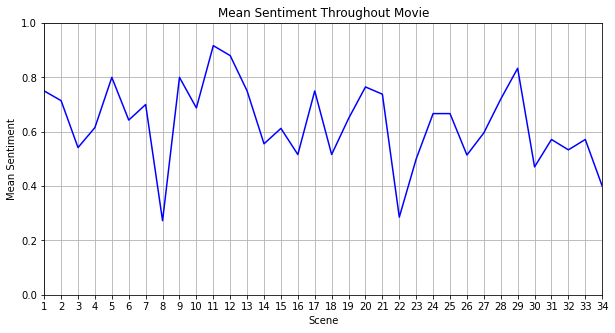

In [110]:
preds = logreg.predict(hp_vectorized)
hp['sentiment_preds'] = preds
hp['clean_wordcount'] = hp['cleanText'].map(lambda x:len(re.findall(r'\w+', x)))
filtered_hp = hp[hp['clean_wordcount'] > 2]
char_counts = filtered_hp['character_name'].value_counts()
char_counts = char_counts[0:25]
char_counts = pd.DataFrame(char_counts)
char_counts['count'] = char_counts['character_name']
char_counts['character_name'] = char_counts.index
char_counts = char_counts.reset_index()
char_counts.drop('index', axis=1)
filtered_hp = filtered_hp[filtered_hp.character_name.isin(char_counts['character_name'])]
scene_sent = pd.DataFrame(hp.groupby('scene', as_index=False).sentiment_preds.mean())
plt.figure(figsize=(10,5))
plt.plot(scene_sent.scene,scene_sent.sentiment_preds, color='blue')
plt.xlabel('Scene')
plt.ylabel('Mean Sentiment')
plt.title('Mean Sentiment Throughout Movie')
plt.ylim(0,1)
plt.xlim(1,34)
x_ticks = np.arange(1, 35, 1)
plt.xticks(x_ticks)
plt.grid(which='both',axis='both')
plt.show()

In [79]:
emotions = pd.read_csv('text_emotion.csv')
emotions = emotions.drop(columns = ['tweet_id', 'author'])
emotions = emotions[emotions.sentiment.isin({'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'})]
emotions['sentiment'] = emotions['sentiment'].map({'empty':0, 'enthusiasm':1, 'fun':2, 'happiness':3, 'hate':4, 'love':5, 'neutral':6, 'relief':7, 'sadness':8, 'surprise':9, 'worry':10})
emotions['cleanText']=emotions['content'].map(lambda x:preprocess(x))
x_train2 = emotions['cleanText']
y_train2 = emotions['sentiment']
x_vectorized = vectorizer.transform(x_train2)


In [80]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_vectorized, y_train2)
train2_vectorized, test2_vectorized, y_train2, y_valid2 = train_test_split(x_smote, y_smote, test_size=0.1)

In [81]:
linsvc2 = LinearSVC(max_iter=800)
linsvc2.fit(train2_vectorized, y_train2)
linsvc2.score(test2_vectorized, y_valid2)

0.784255946116607

Text(0, 0.5, 'Emotion')

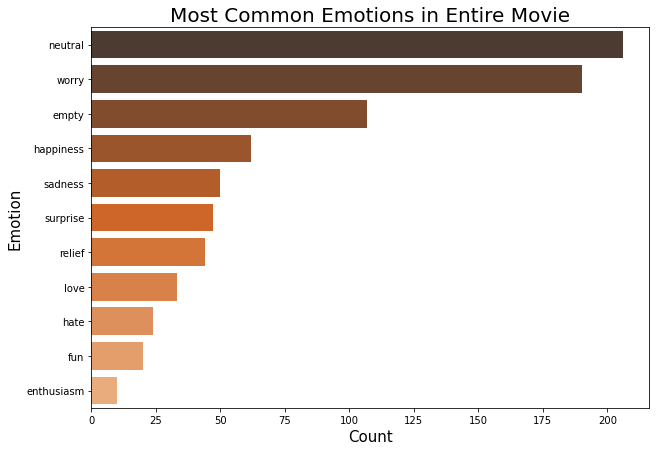

In [82]:
preds2 = linsvc2.predict(hp_vectorized)
hp['emotion_preds'] = preds2
hp['emotion_preds'] = hp['emotion_preds'].map({0:'empty', 1:'enthusiasm', 2:'fun', 3:'happiness', 4:'hate', 5:'love', 6:'neutral', 7:'relief', 8:'sadness', 9:'surprise', 10:'worry'})
total_emotions = pd.DataFrame(hp.groupby('emotion_preds', as_index=False).ID_number.count())
total_emotions = total_emotions.sort_values('ID_number', ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(y='emotion_preds', x='ID_number', data=total_emotions, palette="Oranges_d", orient='h')
plt.title('Most Common Emotions in Entire Movie', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Emotion', fontsize=15)

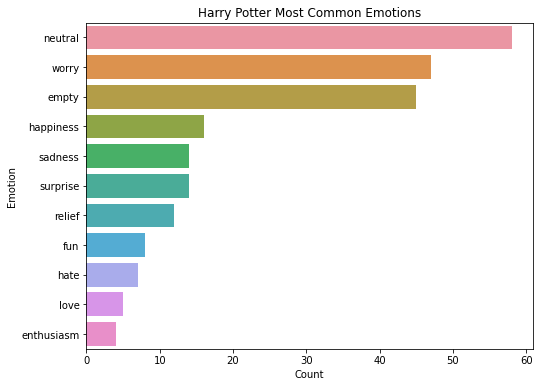

In [87]:
char_emotions = pd.DataFrame(hp.groupby('character_name').emotion_preds.value_counts())
char_emotions = char_emotions.rename(columns={'emotion_preds': 'counts'})
char_emotions = char_emotions.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='emotion_preds', x='counts', data=char_emotions[char_emotions['character_name']=='Harry Potter'])
plt.title('Harry Potter Most Common Emotions')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

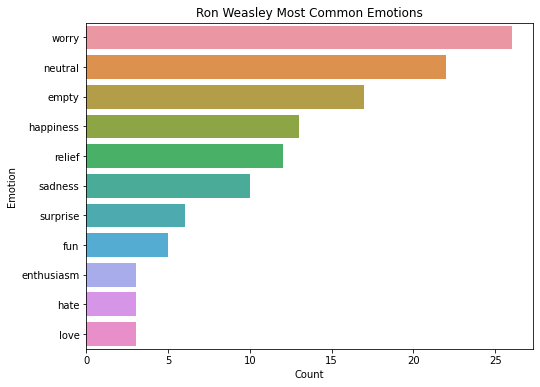

In [111]:
plt.figure(figsize=(8,6))
sns.barplot(y='emotion_preds', x='counts', data=char_emotions[char_emotions['character_name']=='Ron Weasley'])
plt.title('Ron Weasley Most Common Emotions')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

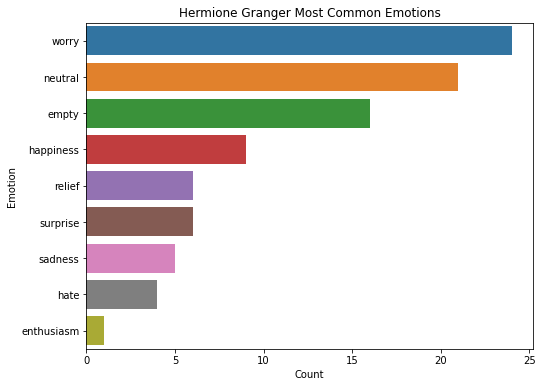

In [117]:
plt.figure(figsize=(8,6))
sns.barplot(y='emotion_preds', x='counts', data=char_emotions[char_emotions['character_name']=='Hermione Granger'])
plt.title('Hermione Granger Most Common Emotions')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

IndexError: too many indices for array

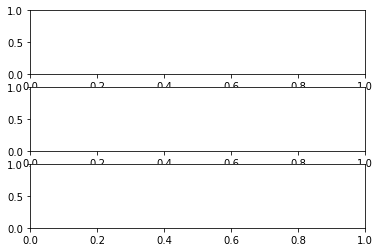

In [116]:

fig, axs = plt.subplots(3, 1)
axs[0, 0].plot(char_emotions)
axs[0, 0].set_title('Axis [0,0]')



for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [118]:
char_emotions

character_name emotion_preds  counts
0    Albus Dumbledore         worry       8
1    Albus Dumbledore       neutral       4
2    Albus Dumbledore          love       3
3    Albus Dumbledore      surprise       3
4    Albus Dumbledore       sadness       2
..                ...           ...     ...
167         Voldemort       neutral       3
168         Voldemort          hate       2
169         Voldemort         empty       1
170         Voldemort      surprise       1
171         Voldemort         worry       1

[172 rows x 3 columns]

In [139]:
char_emotions2 = char_emotions[(char_emotions.character_name == 'Harry Potter') | (char_emotions.character_name == 'Ron Weasley')| (char_emotions.character_name == 'Hermione Granger')]
char_emotions2

character_name emotion_preds  counts
53       Harry Potter       neutral      58
54       Harry Potter         worry      47
55       Harry Potter         empty      45
56       Harry Potter     happiness      16
57       Harry Potter       sadness      14
58       Harry Potter      surprise      14
59       Harry Potter        relief      12
60       Harry Potter           fun       8
61       Harry Potter          hate       7
62       Harry Potter          love       5
63       Harry Potter    enthusiasm       4
64   Hermione Granger         worry      24
65   Hermione Granger       neutral      21
66   Hermione Granger         empty      16
67   Hermione Granger     happiness       9
68   Hermione Granger        relief       6
69   Hermione Granger      surprise       6
70   Hermione Granger       sadness       5
71   Hermione Granger          hate       4
72   Hermione Granger    enthusiasm       1
121       Ron Weasley         worry      26
122       Ron Weasley       neutral      22
123       Ron Weasley         empty      17
124       Ron Weasley     happiness      13
125       Ron Weasley        relief      12
126       Ron Weasley       sadness      10
127       Ron Weasley      surprise       6
128       Ron Weasley           fun       5
129       Ron Weasley    enthusiasm       3
130       Ron Weasley          hate       3
131       Ron Weasley          love       3

In [141]:
minHarry = char_emotions['counts'][char_emotions['character_name']=='Harry Potter'].min()
maxHarry = char_emotions['counts'][char_emotions['character_name']=='Harry Potter'].max()
harry = maxHarry - minHarry
for n in char_emotions['emotion_preds'][char_emotions['character_name']=='Harry Potter']:
    char_emotions2['counts'][(char_emotions2['character_name']=='Harry Potter') & (char_emotions2['emotion_preds']==n)] -= minHarry
    char_emotions2['counts'][(char_emotions2['character_name']=='Harry Potter') & (char_emotions2['emotion_preds']==n)] /= harry

<ipython-input-141-96175b4c95a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_emotions2['counts'][(char_emotions2['character_name']=='Harry Potter') & (char_emotions2['emotion_preds']==n)] -= minHarry
/Users/chikaze/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-141-96175b4c95a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [143]:
minRon = char_emotions['counts'][char_emotions['character_name']=='Ron Weasley'].min()
maxRon = char_emotions['counts'][char_emotions['character_name']=='Ron Weasley'].max()
ron = maxRon - minRon
for n in char_emotions['emotion_preds'][char_emotions['character_name']=='Ron Weasley']:
    char_emotions2['counts'][(char_emotions2['character_name']=='Ron Weasley') & (char_emotions2['emotion_preds']==n)] -= minRon
    char_emotions2['counts'][(char_emotions2['character_name']=='Ron Weasley') & (char_emotions2['emotion_preds']==n)] /= ron

<ipython-input-143-be70c772d99c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_emotions2['counts'][(char_emotions2['character_name']=='Ron Weasley') & (char_emotions2['emotion_preds']==n)] -= minRon
/Users/chikaze/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-143-be70c772d99c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [144]:
minH = char_emotions['counts'][char_emotions['character_name']=='Hermione Granger'].min()
maxH = char_emotions['counts'][char_emotions['character_name']=='Hermione Granger'].max()
Hermione = maxH - minH
for n in char_emotions['emotion_preds'][char_emotions['character_name']=='Hermione Granger']:
    char_emotions2['counts'][(char_emotions2['character_name']=='Hermione Granger') & (char_emotions2['emotion_preds']==n)] -= minH
    char_emotions2['counts'][(char_emotions2['character_name']=='Hermione Granger') & (char_emotions2['emotion_preds']==n)] /= Hermione

<ipython-input-144-2c75f9be00b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_emotions2['counts'][(char_emotions2['character_name']=='Hermione Granger') & (char_emotions2['emotion_preds']==n)] -= minH
<ipython-input-144-2c75f9be00b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_emotions2['counts'][(char_emotions2['character_name']=='Hermione Granger') & (char_emotions2['emotion_preds']==n)] /= Hermione


In [145]:
char_emotions2

character_name emotion_preds    counts
53       Harry Potter       neutral  1.000000
54       Harry Potter         worry  0.796296
55       Harry Potter         empty  0.759259
56       Harry Potter     happiness  0.222222
57       Harry Potter       sadness  0.185185
58       Harry Potter      surprise  0.185185
59       Harry Potter        relief  0.148148
60       Harry Potter           fun  0.074074
61       Harry Potter          hate  0.055556
62       Harry Potter          love  0.018519
63       Harry Potter    enthusiasm  0.000000
64   Hermione Granger         worry  1.000000
65   Hermione Granger       neutral  0.869565
66   Hermione Granger         empty  0.652174
67   Hermione Granger     happiness  0.347826
68   Hermione Granger        relief  0.217391
69   Hermione Granger      surprise  0.217391
70   Hermione Granger       sadness  0.173913
71   Hermione Granger          hate  0.130435
72   Hermione Granger    enthusiasm  0.000000
121       Ron Weasley         worry  1.000000
122       Ron Weasley       neutral  0.826087
123       Ron Weasley         empty  0.608696
124       Ron Weasley     happiness  0.434783
125       Ron Weasley        relief  0.391304
126       Ron Weasley       sadness  0.304348
127       Ron Weasley      surprise  0.130435
128       Ron Weasley           fun  0.086957
129       Ron Weasley    enthusiasm  0.000000
130       Ron Weasley          hate  0.000000
131       Ron Weasley          love  0.000000

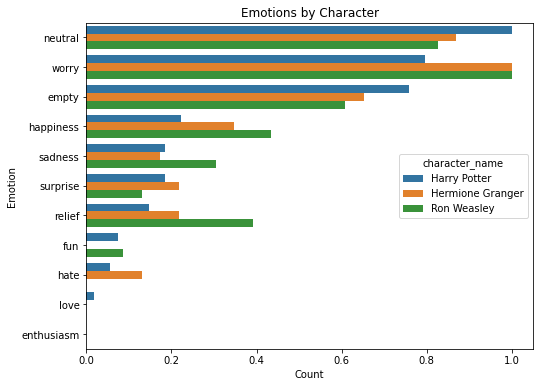

In [146]:
plt.figure(figsize=(8,6))
sns.barplot(y='emotion_preds', x='counts',hue='character_name', data=char_emotions2)
plt.title('Emotions by Character')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

Text(0, 0.5, 'Emotion')

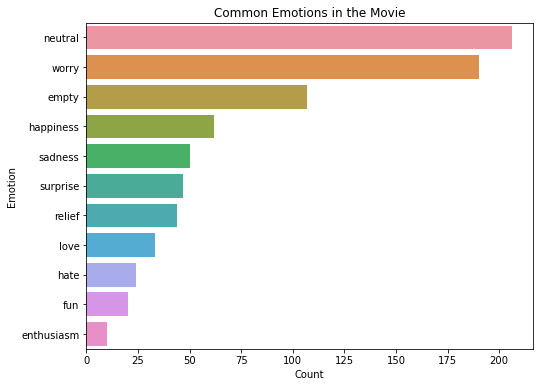

In [150]:
total_emotions = pd.DataFrame(hp.groupby('emotion_preds', as_index=False).ID_number.count())
total_emotions = total_emotions.sort_values('ID_number', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(y='emotion_preds', x='ID_number', data=total_emotions,  orient='h')
plt.title('Common Emotions in the Movie')
plt.xlabel('Count')
plt.ylabel('Emotion')